In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
pokemon_path = "all_pokemon_data.csv"
pokemon_db = pd.read_csv(pokemon_path)
pokemon_db.head()

,Name,National Dex #,Primary Typing,Secondary Typing,Secondary Typing Flag,Generation,Legendary Status,Form,Alt Form Flag,Evolution Stage,...,Weight (hg),Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
0,bulbasaur,1,grass,poison,True,generation-i,False,Base,False,1,...,69,28,15,318,45,49,49,65,65,45
1,ivysaur,2,grass,poison,True,generation-i,False,Base,False,2,...,130,39,29,405,60,62,63,80,80,60
2,venusaur,3,grass,poison,True,generation-i,False,Base,False,3,...,1000,79,220,525,80,82,83,100,100,80
3,venusaur-mega,3,grass,poison,True,generation-i,True,Mega,True,3,...,1555,94,343,625,80,100,123,122,120,80
4,charmander,4,fire,NaN,False,generation-i,False,Base,False,1,...,85,24,19,309,39,52,43,60,50,65


In [3]:
pokemon_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   1184 non-null   object
 1   National Dex #         1184 non-null   int64 
 2   Primary Typing         1184 non-null   object
 3   Secondary Typing       654 non-null    object
 4   Secondary Typing Flag  1184 non-null   bool  
 5   Generation             1184 non-null   object
 6   Legendary Status       1184 non-null   bool  
 7   Form                   1184 non-null   object
 8   Alt Form Flag          1184 non-null   bool  
 9   Evolution Stage        1184 non-null   int64 
 10  Number of Evolution    1184 non-null   int64 
 11  Color ID               1184 non-null   object
 12  Catch Rate             1184 non-null   int64 
 13  Height (dm)            1184 non-null   int64 
 14  Weight (hg)            1184 non-null   int64 
 15  Height (in)          

In [8]:
pokemon_db.isnull().sum()


Name                       0
National Dex #             0
Primary Typing             0
Secondary Typing         530
Secondary Typing Flag      0
Generation                 0
Legendary Status           0
Form                       0
Alt Form Flag              0
Evolution Stage            0
Number of Evolution        0
Color ID                   0
Catch Rate                 0
Height (dm)                0
Weight (hg)                0
Height (in)                0
Weight (lbs)               0
Base Stat Total            0
Health                     0
Attack                     0
Defense                    0
Special Attack             0
Special Defense            0
Speed                      0
dtype: int64

In [9]:
pokemon_db.shape

(1184, 24)

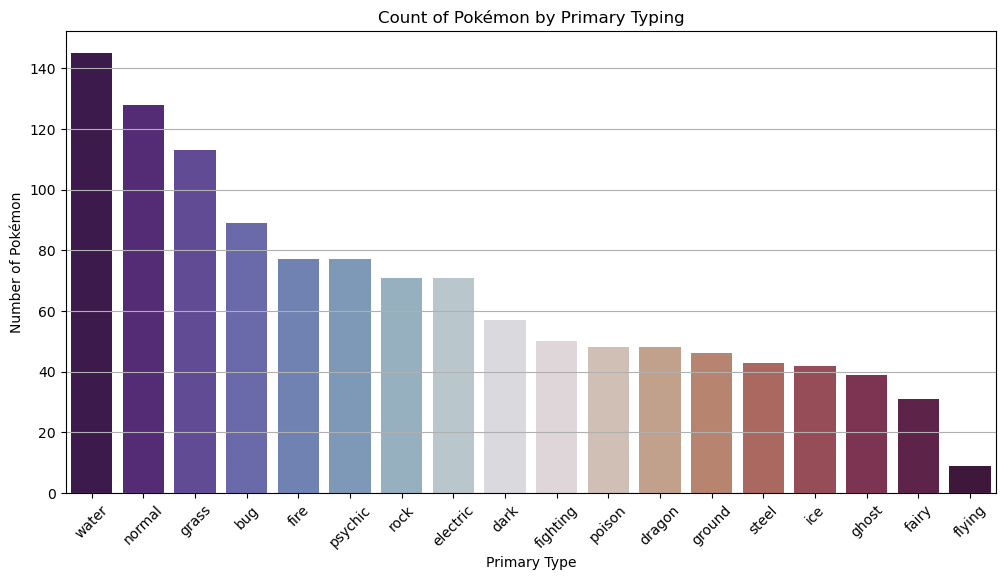

In [25]:
plt.figure(figsize=(12, 6))
type_counts = pokemon_db['Primary Typing'].value_counts()
sb.barplot(x=type_counts.index, y=type_counts.values, palette='twilight_shifted')
plt.title('Count of Pokémon by Primary Typing')
plt.xlabel('Primary Type')
plt.ylabel('Number of Pokémon')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

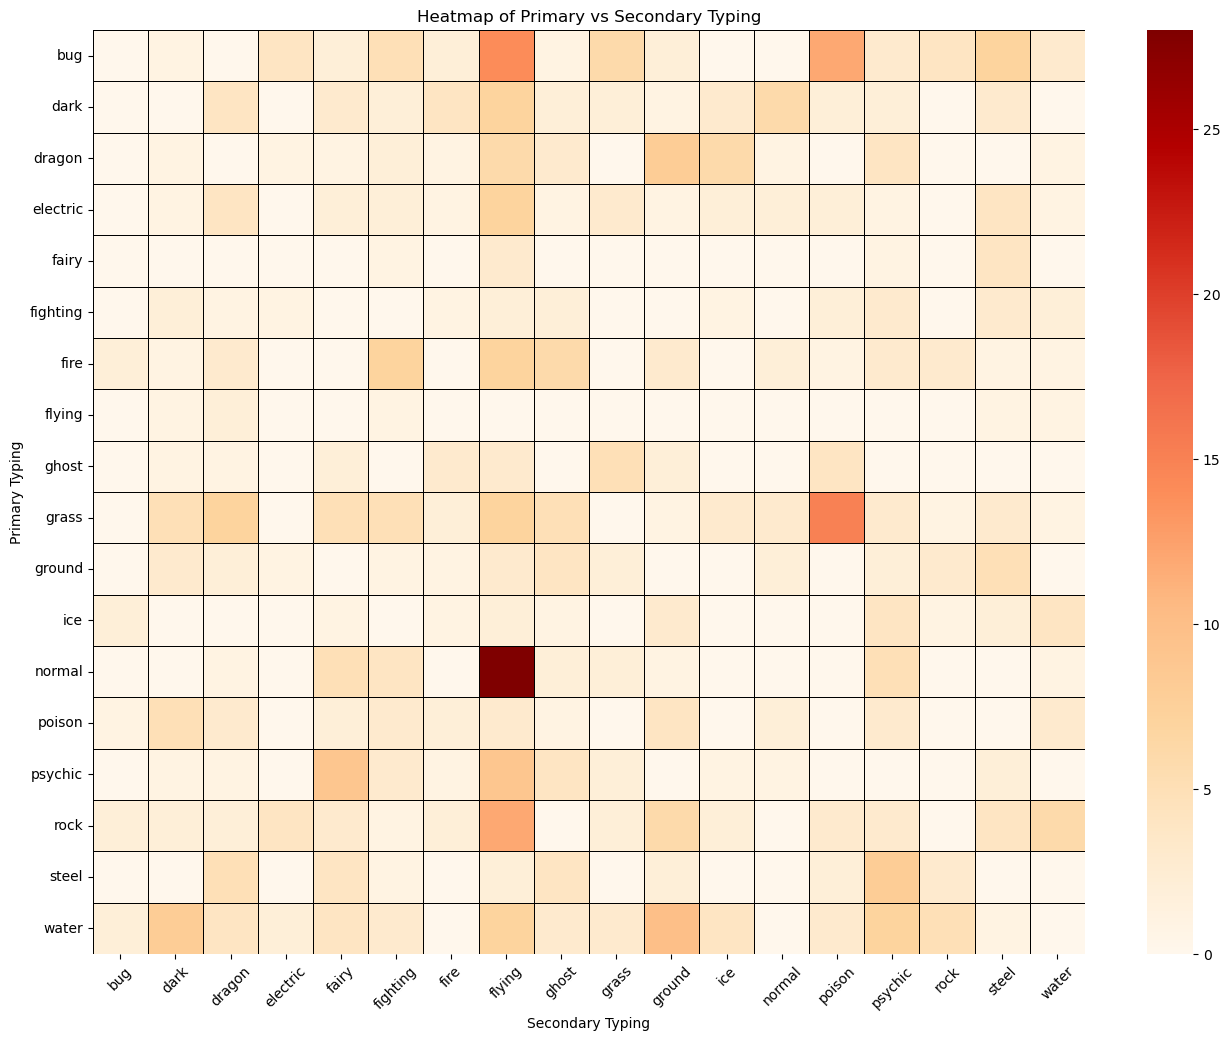

In [30]:
type_combo = pd.crosstab(pokemon_db['Primary Typing'], pokemon_db['Secondary Typing'])
plt.figure(figsize=(16, 12))
sb.heatmap(type_combo, cmap='OrRd', linewidths=0.5, linecolor='black')
plt.title('Heatmap of Primary vs Secondary Typing')
plt.xlabel('Secondary Typing')
plt.ylabel('Primary Typing')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

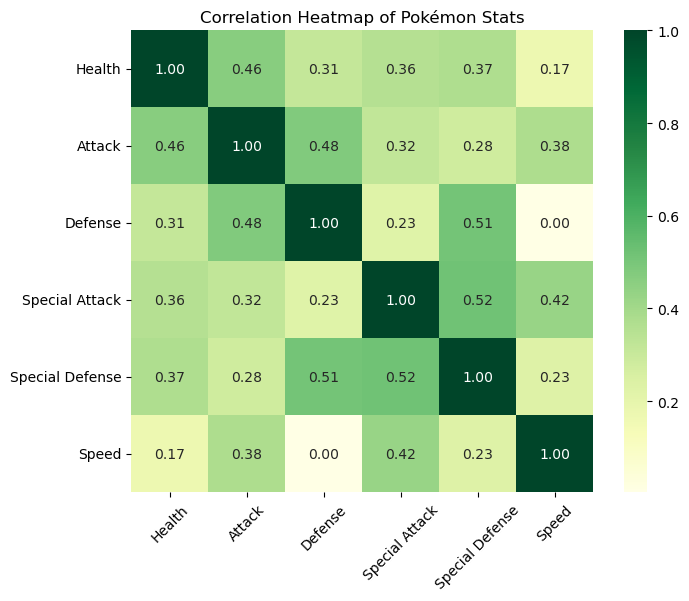

In [31]:
stat_cols = ['Health', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']
corr = pokemon_db[stat_cols].corr()

plt.figure(figsize=(8, 6))
sb.heatmap(corr, annot=True, cmap='YlGn', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Pokémon Stats')
plt.xticks(rotation=45)
plt.show()